In [2]:
import os
import sys
from chordUtils import json2lab
from subprocess import call
import json
import argparse
import chordUtils
import essentia.standard
import vamp
import numpy as np
import re
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from scipy.misc import logsumexp

sns.set(style="white", context="talk")
degrees=['I', 'IIb', 'II', 'IIIb', 'III', 'IV', 'Vb', 'V', 'VIb', 'VI', 'VIIb', 'VII']

def logNormalize(chromas):
    data = chromas
    data[data == 0] = np.exp(-10)
    data=np.log(preprocessing.normalize(chromas, norm='l1'))
    #data=preprocessing.normalize(chromas, norm='l1')

    # '/1000' is a hack in order to eliminate zero deviation.
    data[data < -10.0] = -10
    data[np.isnan(data)] = -10
    data[np.isinf(data)] = -10

    return data

In [3]:
def fitMixture(data, max_components=40, min_components=1):
    bic = 1000000
    bic_i = 0
    for i in range(min_components, max_components + 1):
        gm = GaussianMixture(
            n_components=i, covariance_type='full',
            max_iter=200,
            random_state = 18)
        gm.fit(data)
        curBic = gm.bic(data)
        print i, curBic, gm.converged_
        if (curBic < bic):
            bic = curBic
            bic_i = i
        #print gm.weights_
    gm = GaussianMixture(
        n_components=bic_i, covariance_type='full',
        max_iter=200,
        random_state = 8)
    gm.fit(data)
    return gm

# Guitar "toy" dataset. Major triad.

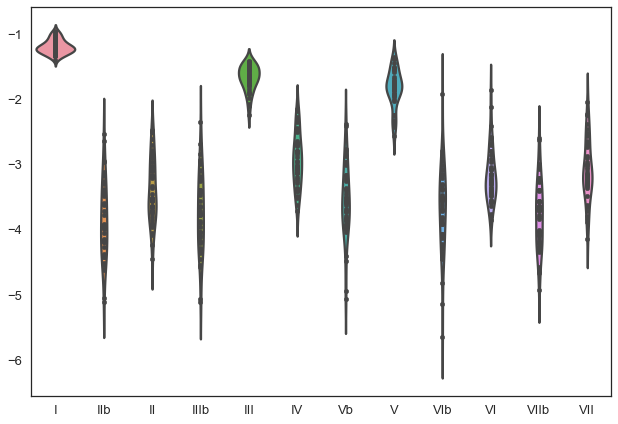

In [4]:
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar35.npz')
chromas = logNormalize(chromas)
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
dMaj < 0
sns.violinplot(data=dMaj, inner="point")
plt.show()

# Guitar "toy" dataset. Major mixture (triad, maj7, maj6, maj69).

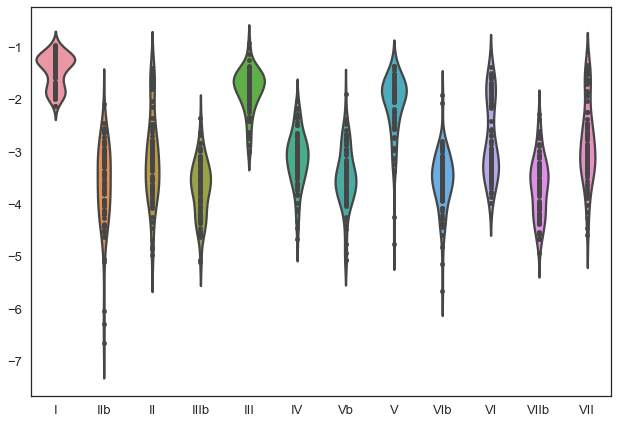

In [5]:
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar_maj.npz')
chromas = logNormalize(chromas)
dMaj = pd.DataFrame(data=chromas[kinds =='maj'], columns=degrees)
sns.violinplot(data=dMaj, inner="point")
plt.show()

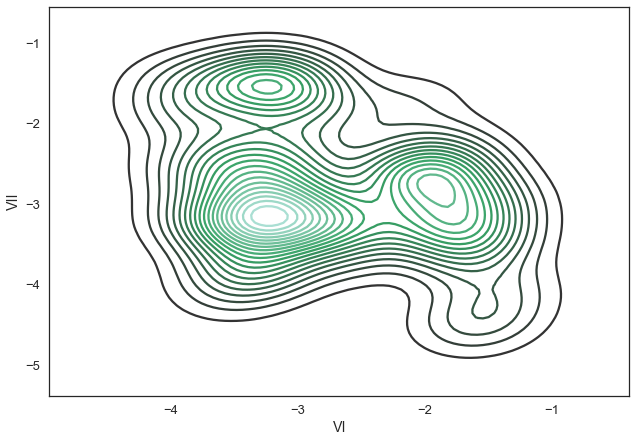

In [6]:
sns.kdeplot(dMaj['VI'], dMaj['VII'], n_levels=30)
plt.show()

1 1771.42797408 True
2 1855.69467186 True
3 2000.42221944 True
4 2078.99756303 True
5 2104.02907051 True
6 1850.25955245 True
7 2050.0809785 True
8 1734.72764048 True
9 1447.60139531 True
10 1267.8340704 True
11 1361.40971488 True
12 1172.40925326 True
13 1354.97317621 True
14 1229.5897818 True
15 1253.03276912 True
16 888.977533076 True
17 553.657097078 True
18 589.873366197 True
19 1071.71988164 True
20 1297.53604777 True
21 1641.26179238 True
22 1779.40581398 True
23 1773.35237864 True
24 2054.70762817 True
25 2408.50978965 True
26 2498.87849912 True
27 2699.49344651 True
28 2981.0179857 True
29 3361.07035504 True
30 3741.17994098 True
31 4021.23969359 True
32 4349.96017838 True
33 4597.62240613 True
34 4971.76054303 True
35 5245.10181263 True
36 5599.42002147 True
37 5809.34149938 True
38 6189.74886094 True
39 6544.38835988 True
40 6871.45773618 True
41 7251.55280962 True
42 7561.10312869 True
43 7941.2479085 True
44 8226.6404844 True
45 8607.18321735 True
46 8826.52858318 True
47 

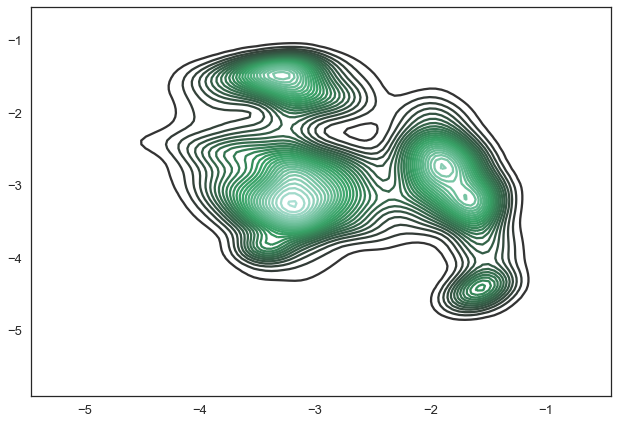

In [18]:
#initialMeans = np.array([[1.0, -5.0, -5.0, -5.0, 1.0, -5.0, -5.0, 1.0, -5.0, -5.0,-5.0, 1.0],
#                        [1.0, -5.0, 1.0, -5.0, 1.0, -5.0, -5.0, 0.0, 0.0, 1.0, -5.0, -5.0],
#                        [1.0, -5.0, -5.0, -5.0, 1.0, -5.0, -5.0, 0.0, -5.0, 1.0, -5.0, -5.0],
#                        [1.0, -5.0, -5.0, -5.0, 1.0, -5.0, -5.0, 1.0, -5.0, -5.0, -5.0, -5.0]])
#initialWeights = np.array([0.25, 0.25, 0.25, 0.25])
#for i in range(1, 21):
gm = fitMixture(dMaj.values, max_components=50)
#gm = GaussianMixture(
#    n_components=4, covariance_type='full',
#    max_iter=200,
#    random_state = 8)
#gm.fit(dMaj.values)
print gm.converged_
print gm.bic(dMaj)
print gm.weights_
samples = np.asarray(gm.sample(4000)[0])
samples[:,[9, 11]].shape
sns.kdeplot(samples[:,[9, 11]], n_levels=30)
plt.show()
majorMeans = gm.means_

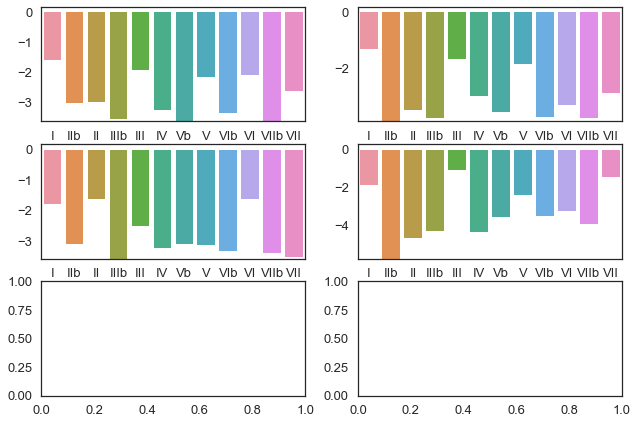

,I,IIb,II,IIIb,III,IV,Vb,V,VIb,VI,VIIb,VII
0,-1.564284,-3.012227,-2.968255,-3.552970,-1.909846,-3.251001,-3.591196,-2.130601,-3.336597,-2.094031,-3.617791,-2.599545
1,-1.280973,-3.865815,-3.460729,-3.729893,-1.656328,-2.965864,-3.524842,-1.818000,-3.694950,-3.268025,-3.732227,-2.853577
2,-1.784592,-3.082263,-1.631367,-3.564523,-2.498091,-3.227118,-3.100337,-3.123177,-3.322710,-1.630690,-3.373103,-3.530599
3,-1.889688,-5.773613,-4.705577,-4.315824,-1.076649,-4.382707,-3.555001,-2.408219,-3.526438,-3.272548,-3.919260,-1.424546


In [7]:
fig, ax = plt.subplots(nrows=3,ncols=2)
ax = np.reshape(np.array(ax), (1, np.size(ax)))[0]


for i in range(len(gm.means_)):
  sns.barplot(degrees,gm.means_[i], ax=ax[i])

plt.show()

df = pd.DataFrame(gm.means_, columns=degrees)
df

# Jazz dataset. Tunes considered so far:

In [66]:
with open('../ready.txt') as f:
      lines = f.readlines()
      print len(lines)
      print "\r".join(lines)

110
annotations/in_a_mellotone.json
annotations/swing_that_music.json
annotations/body_and_soul(hawkins).json
annotations/parkers_mood.json
annotations/west_end_blues.json
annotations/mean_to_me.json
annotations/minor_swing.json
annotations/indiana.json
annotations/st_thomas.json
annotations/dippermouth_blues.json
annotations/livery_stable_blues.json
annotations/i_found_a_new_baby.json
annotations/blue_horizon.json
annotations/tricotism.json
annotations/girl_from_ipanema.json
annotations/giant_steps.json
annotations/dinah.json
annotations/dinah_red_nichols.json
annotations/east_st_louis.json
annotations/cotton_tail.json
annotations/one_oclock_jump.json
annotations/these_foolish_things.json
annotations/hotter_than_that.json
annotations/potato_head_blues.json
annotations/black_bottom_stomp.json
annotations/king_porter_stomp.json
annotations/i_got_rhythm.json
annotations/dinah_fats_waller.json
annotations/west_coast_blues.json
annotations/black_and_tan_fantasy.json
annotations/walkin_shoe

In [67]:
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../out.npz')
chromas=logNormalize(chromas)
dMaj = pd.DataFrame(data=chromas[kinds == 'maj'], columns=degrees)
dMin = pd.DataFrame(data=chromas[kinds == 'min'], columns=degrees)
dDom = pd.DataFrame(data=chromas[kinds == 'dom'], columns=degrees)
dHdim = pd.DataFrame(data=chromas[kinds == 'hdim7'], columns=degrees)
dDim = pd.DataFrame(data=chromas[kinds == 'dim'], columns=degrees)
totalDuration = np.sum(durations)
majDuration=sum(durations[kinds == 'maj'])
minDuration=sum(durations[kinds == 'min'])
domDuration=sum(durations[kinds == 'dom'])
hdimDuration=sum(durations[kinds == 'hdim7'])
dimDuration=sum(durations[kinds == 'dim'])

# Chord kind frequency. TODO: add more hdim7 (minor tunes)

In [68]:
print "Maj: ", len(dMaj), '(', len(dMaj) * 100.0 /len(chromas), '%) beats, ',majDuration,\
'(', majDuration*100.0/totalDuration, '%) sec'
print "Min: ", len(dMin), '(', len(dMin) * 100.0 /len(chromas), '%) beats, ',minDuration, 'sec',\
'(', minDuration*100.0/totalDuration, '%) sec'
print "Dom: ", len(dDom), '(', len(dDom) * 100.0 /len(chromas), '%) beats, ',domDuration, 'sec',\
'(', domDuration*100.0/totalDuration, '%) sec'
print "Hdim7: ", len(dHdim), '(', len(dHdim) * 100.0 /len(chromas), '%) beats, ',hdimDuration, 'sec',\
'(', hdimDuration*100.0/totalDuration, '%) sec'
print "Dim7: ", len(dDim), '(', len(dDim) * 100.0 /len(chromas), '%) beats, ',dimDuration, 'sec',\
'(', dimDuration*100.0/totalDuration, '%) sec'

Maj:  18220 ( 27.6068971787 %) beats,  6497.77700197 ( 26.7383552119 %) sec
Min:  12607 ( 19.1020940028 %) beats,  4513.7390028 sec ( 18.5740379755 %) sec
Dom:  28470 ( 43.1376708385 %) beats,  10234.8169966 sec ( 42.116276428 %) sec
Hdim7:  1264 ( 1.9152095518 %) beats,  506.782000192 sec ( 2.08540815297 %) sec
Dim7:  1602 ( 2.42734628322 %) beats,  562.139999643 sec ( 2.31320634499 %) sec


# Unclassified.

In [69]:
unclassified = labels[kinds == 'unclassified']
Counter(unclassified).most_common(100)

[('N', 3755), (u'B:(4,5,9,13)', 72), (u'Ab:(4,5,b7,13)', 6), (u'Bb:sus4', 2)]

# Major

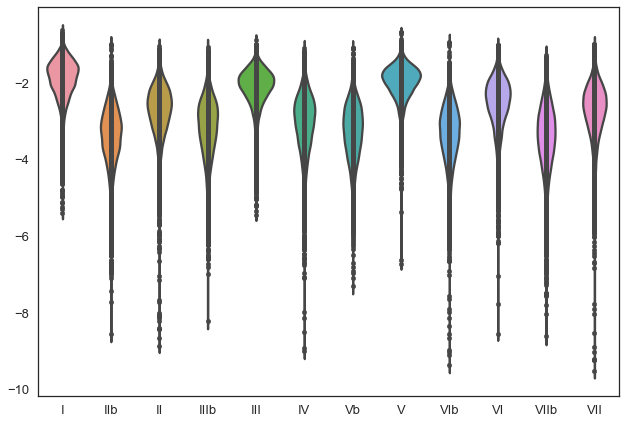

In [86]:
sns.violinplot(data=dMaj, inner="point")
plt.show()

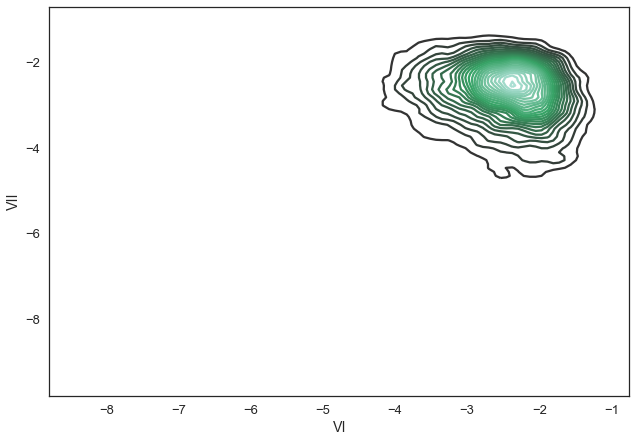

In [87]:
sns.kdeplot(dMaj['VI'], dMaj['VII'], n_levels=30)
plt.show()

24 343354.661987 True
25 344360.408942 True
True
343354.661987
[ 0.05134645  0.06252279  0.0614678   0.04869788  0.00985628  0.07968546
  0.02325621  0.03396175  0.03152085  0.01462542  0.02435171  0.07509725
  0.0292342   0.07601865  0.07739444  0.04063232  0.00054885  0.06561991
  0.05457555  0.03372999  0.00471253  0.02775115  0.04134346  0.03204912]


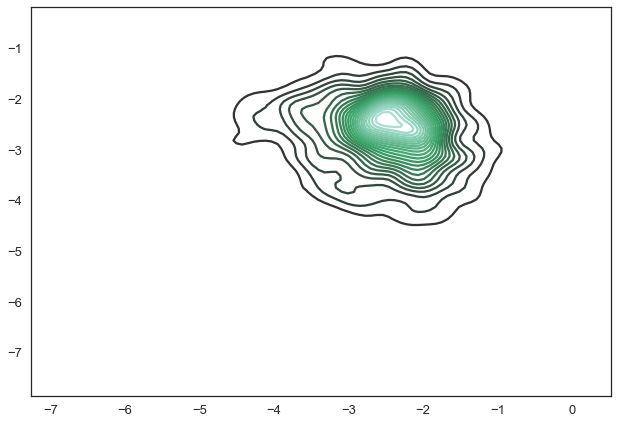

In [94]:
gm = fitMixture(dMaj.values, max_components=50)
#gm = GaussianMixture(
#    n_components=96, covariance_type='full',
#    max_iter=200,
#    random_state = 8)
#gm.fit(dMaj.values)
gmMaj = gm
print gm.converged_
print gm.bic(dMaj)
print gm.weights_

samples = np.asarray(gm.sample(1000)[0])
samples[:,[9, 11]].shape
sns.kdeplot(samples[:,[9, 11]], n_levels=30)
plt.show()

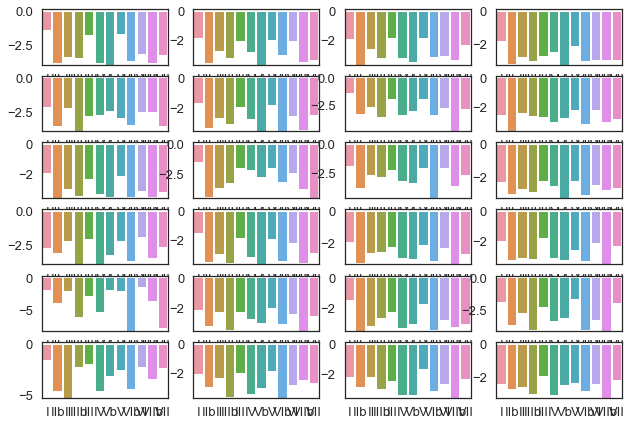

,I,IIb,II,IIIb,III,IV,Vb,V,VIb,VI,VIIb,VII
0,-1.312954,-3.759406,-3.275759,-3.397745,-1.692091,-3.729476,-3.858696,-1.609912,-3.629107,-3.092898,-3.754164,-3.156952
1,-1.842748,-3.560194,-2.710148,-3.214606,-2.035519,-2.813966,-3.678043,-1.989456,-3.013526,-2.064597,-3.481592,-3.336385
2,-1.917540,-3.658513,-2.605803,-3.212923,-1.816324,-3.171076,-3.482059,-1.798199,-3.154338,-3.073155,-3.358318,-2.284818
3,-1.805551,-3.161082,-2.730038,-3.001699,-2.691734,-2.469205,-3.206183,-2.103318,-3.013735,-2.923032,-2.903270,-2.940013
4,-2.064240,-3.472791,-2.190943,-3.855777,-2.774305,-2.697335,-2.393830,-2.915881,-3.395511,-2.471588,-2.449827,-3.508608
5,-1.684660,-3.375067,-2.674975,-3.102590,-1.958903,-2.717550,-3.537026,-1.816807,-3.558634,-2.548972,-3.469103,-2.481058
6,-1.355829,-3.353930,-2.683710,-3.581479,-1.892063,-3.417139,-3.075676,-1.887667,-3.445623,-2.793861,-4.934525,-2.850438
7,-2.553156,-3.631525,-2.388721,-2.558861,-2.631744,-2.993287,-2.728288,-2.161954,-3.154912,-2.202862,-2.992387,-2.787556
8,-1.926216,-3.601374,-2.986780,-3.492902,-2.302973,-3.373233,-3.577975,-2.140415,-3.523578,-3.151942,-3.542677,-3.190183
9,-1.461865,-4.445656,-3.686046,-3.218008,-1.949074,-2.129205,-2.743755,-1.922447,-3.157055,-2.402986,-3.737610,-4.493341


In [95]:
fig, ax = plt.subplots(nrows=6,ncols=4)
ax = np.reshape(np.array(ax), (1, np.size(ax)))[0]


for i in range(len(gm.means_)):
  sns.barplot(degrees,gm.means_[i], ax=ax[i])

plt.show()

df = pd.DataFrame(gm.means_, columns=degrees)
df

# Minor

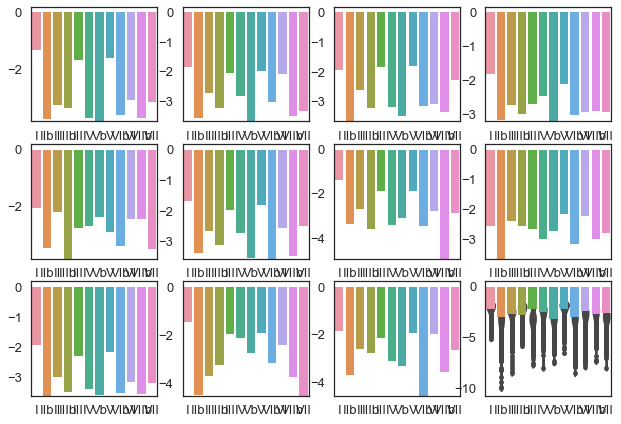

In [74]:
sns.violinplot(data=dMin, inner="point")
plt.show()

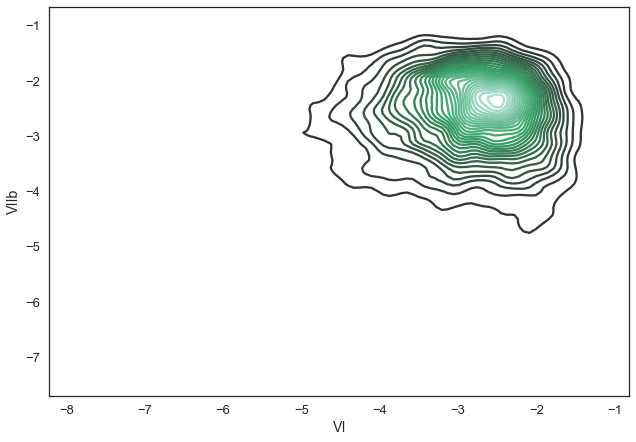

In [75]:
sns.kdeplot(dMin['VI'], dMin['VIIb'], n_levels=30)
plt.show()

1 286680.164399 True
2 269755.397477 True
3 265110.636744 True
4 263862.13159 True
5 260924.473763 True
6 259121.048713 True
7 258959.369715 True
8 257021.162549 True
9 256630.093104 True
10 256272.311856 True
11 256494.010592 True
12 255880.646529 True
13 255711.889408 True
14 255459.516708 True
15 255568.95531 True
16 255626.753826 True
17 255845.351386 True
18 256234.59185 True
19 256456.875187 True
20 255976.094882 True
21 255997.413627 True
22 255877.816472 True
23 257178.112134 True
24 256465.92748 True
25 257189.244928 True
26 257337.688802 True
27 257106.091901 True
28 258714.917657 True
29 258582.432729 True
30 258016.732494 True
31 258819.626396 True
32 258665.65287 True
33 259787.927721 True
34 259120.960396 True
35 259006.151233 True
36 260552.892443 True
37 259908.750326 True
38 261086.035164 True
39 260538.552189 True
40 261618.813632 True
41 261781.640878 True
42 262071.902937 True
43 262214.132663 True
44 262986.272836 True
45 263170.511231 True
46 264222.428659 True
47

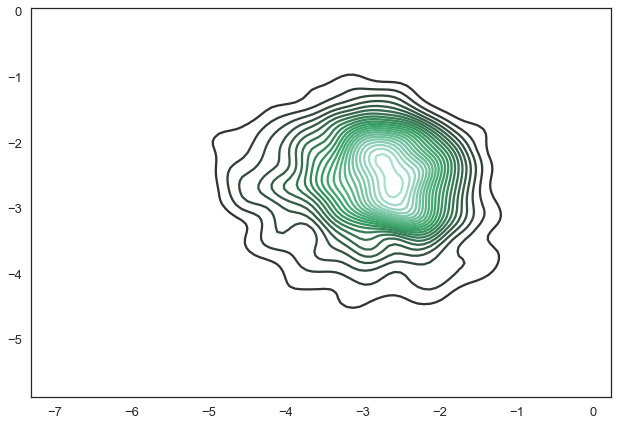

In [76]:
gm = fitMixture(dMin.values, max_components=50)
#gm = GaussianMixture(
#    n_components=147, covariance_type='full',
#    max_iter=200,
#    random_state = 8)
#gm.fit(dMin.values)
gmMin=gm
print gm.converged_
print gm.bic(dMin)
print gm.weights_

samples = np.asarray(gm.sample(1000)[0])
samples[:,[9, 11]].shape
sns.kdeplot(samples[:,[9, 10]], n_levels=30)
plt.show()

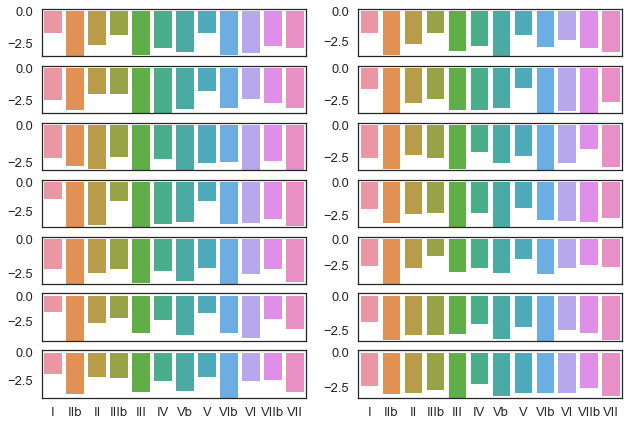

,I,IIb,II,IIIb,III,IV,Vb,V,VIb,VI,VIIb,VII
0,-1.717502,-3.567094,-2.651955,-1.893962,-3.445172,-2.902249,-3.190253,-1.693465,-3.442091,-3.290485,-2.771788,-2.927320
1,-1.802841,-3.673990,-2.754989,-1.809653,-3.355419,-2.887766,-3.772017,-1.951168,-2.954617,-2.423699,-3.040347,-3.415345
2,-2.470828,-3.249159,-2.010522,-2.063117,-3.515119,-3.541413,-3.208812,-1.761014,-3.138486,-2.449364,-2.771122,-3.131745
3,-1.618982,-3.565470,-2.727200,-2.430486,-3.323919,-3.316137,-3.142037,-1.579017,-3.532127,-3.422760,-3.579342,-2.653971
4,-2.218831,-2.726325,-2.974937,-2.180203,-3.035402,-2.311551,-3.033005,-2.552329,-2.513798,-3.022962,-2.401960,-3.031002
5,-2.557126,-3.345858,-2.291457,-2.515770,-3.379714,-2.087669,-2.907725,-2.344021,-3.471165,-2.918570,-1.863972,-3.198086
6,-1.466549,-3.856807,-3.651458,-1.608371,-3.835837,-3.588284,-3.446759,-1.619117,-3.614749,-3.536220,-3.157430,-3.788867
7,-1.985053,-3.086282,-2.365002,-2.340958,-3.362301,-2.323284,-3.345085,-1.931432,-2.832639,-2.879806,-2.953327,-2.667351
8,-2.182849,-3.258798,-2.450197,-2.160383,-3.170611,-2.303938,-3.055239,-2.138195,-3.272941,-2.518848,-2.223750,-3.167940
9,-2.565791,-4.333075,-2.770558,-1.661488,-3.234626,-2.762865,-3.255143,-1.930179,-3.347483,-2.765898,-2.486376,-2.714255


In [84]:
fig, ax = plt.subplots(nrows=7,ncols=2)
ax = np.reshape(np.array(ax), (1, np.size(ax)))[0]


for i in range(len(gm.means_)):
  sns.barplot(degrees,gm.means_[i], ax=ax[i])

plt.show()

df = pd.DataFrame(gm.means_, columns=degrees)
df

# Dominant

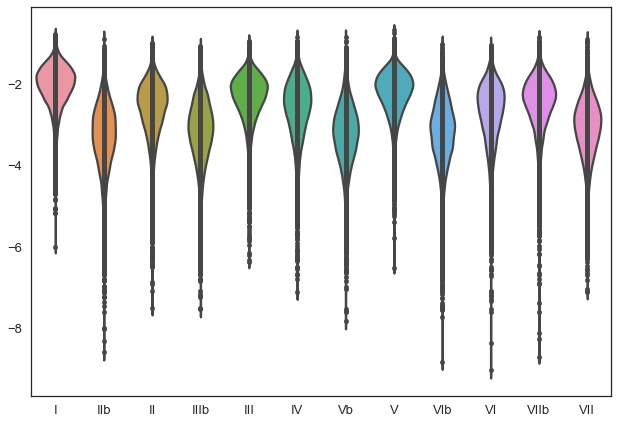

In [96]:
sns.violinplot(data=dDom, inner="point")
plt.show()

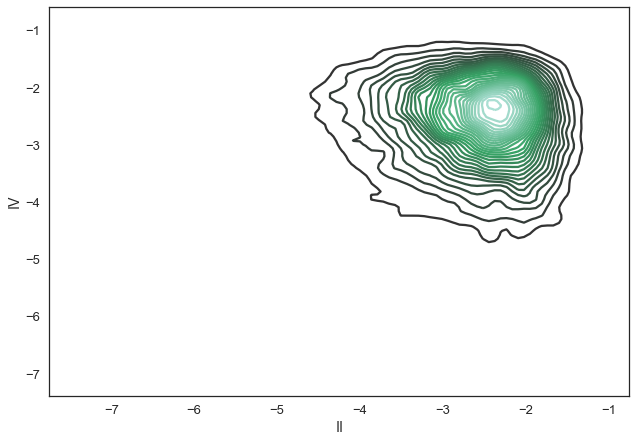

In [97]:
sns.kdeplot(dDom['II'], dDom['IV'], n_levels=30)
plt.show()

1 638499.628246 True
2 604947.096521 True
3 596144.891133 True
4 587658.429299 True
5 586161.021405 True
6 580225.541612 True
7 577290.277028 True
8 575316.701383 True
9 573479.053189 True
10 573775.94446 True
11 570961.061443 True
12 571219.977155 True
13 569317.707655 True
14 569920.100268 True
15 568468.302053 True
16 568219.947296 True
17 568387.928364 True
18 567449.695325 True
19 567143.230178 True
20 566320.457352 True
21 567135.609237 True
22 566374.936993 True
23 567332.658188 True
24 565873.044015 True
25 566200.672812 True
26 565413.003321 True
27 566137.227471 True
28 566096.243992 True
29 567993.656468 True
30 566699.989298 True
31 566956.739359 True
32 565892.204272 True
33 566057.355957 True
34 566379.894098 True
35 566401.958042 True
36 566967.361166 True
37 566464.73195 True
38 566840.988696 True
39 567156.347206 True
40 566816.712372 True
41 569541.347658 True
42 566715.045671 True
43 567965.706898 True
44 567944.947378 True
45 568939.724726 True
46 568764.319861 True

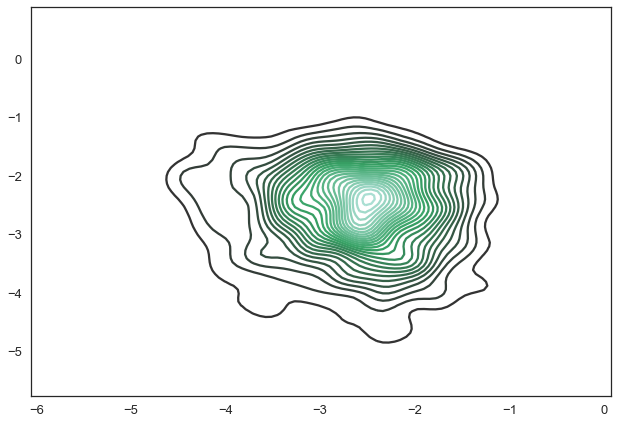

In [98]:
gm = fitMixture(dDom.values, max_components=50)
#gm = GaussianMixture(
#    n_components=109, covariance_type='full',
#    max_iter=200,
#    random_state = 8)
#gm.fit(dDom.values)
gmDom=gm
print gm.converged_
print gm.bic(dDom)
print gm.weights_

samples = np.asarray(gm.sample(1000)[0])
samples[:,[9, 11]].shape
sns.kdeplot(samples[:,[2, 5]], n_levels=30)
plt.show()

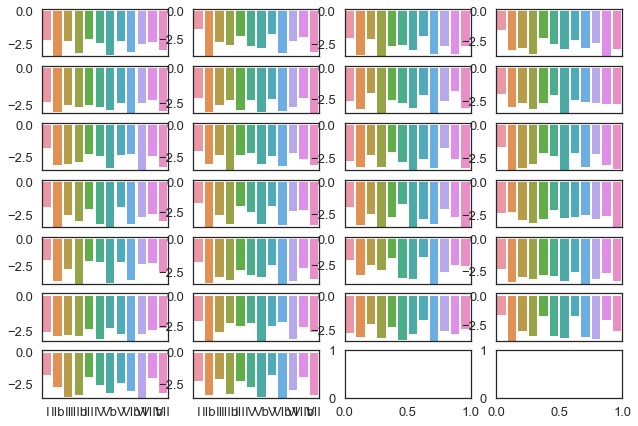

,I,IIb,II,IIIb,III,IV,Vb,V,VIb,VI,VIIb,VII
0,-2.181921,-3.400689,-2.273407,-3.177870,-2.111406,-2.370915,-3.260704,-2.223782,-3.034811,-2.464801,-2.278936,-2.924105
1,-1.570239,-4.081275,-2.750470,-3.055218,-2.198906,-3.106429,-3.310766,-2.062054,-3.759844,-2.684095,-2.339668,-3.720259
2,-2.013172,-3.370848,-2.100775,-3.452326,-2.663487,-2.616752,-2.996014,-1.902344,-3.265015,-2.619132,-3.262122,-2.674785
3,-1.542183,-3.165801,-3.065919,-3.517007,-2.170372,-2.735113,-3.090109,-2.361628,-2.997713,-2.620843,-3.735095,-3.097149
4,-2.294432,-2.965449,-2.486519,-2.612496,-2.486848,-2.612206,-2.835096,-2.386939,-3.068710,-2.389870,-2.183810,-2.912293
5,-2.152238,-3.207419,-2.662596,-2.278704,-2.995649,-2.330456,-3.175728,-2.226831,-3.080068,-2.829068,-2.143057,-3.266319
6,-2.685057,-3.294586,-1.976458,-3.653319,-2.582138,-2.849486,-3.201501,-2.159872,-3.618633,-2.658613,-1.847535,-3.197303
7,-1.967966,-2.908047,-2.616790,-3.050683,-2.616078,-2.062011,-3.405064,-2.429140,-2.551142,-2.619777,-2.692423,-2.720627
8,-1.801688,-3.081454,-2.987657,-2.870666,-2.226118,-2.415322,-3.338033,-2.284290,-2.259881,-3.481774,-2.422862,-3.201904
9,-1.988835,-3.043344,-2.299863,-3.513808,-2.352918,-2.197979,-3.051296,-2.406827,-3.187968,-2.182918,-2.633931,-3.080709


In [99]:
fig, ax = plt.subplots(nrows=7,ncols=4)
ax = np.reshape(np.array(ax), (1, np.size(ax)))[0]


for i in range(len(gm.means_)):
  sns.barplot(degrees,gm.means_[i], ax=ax[i])

plt.show()

df = pd.DataFrame(gm.means_, columns=degrees)
df

# Hdim7

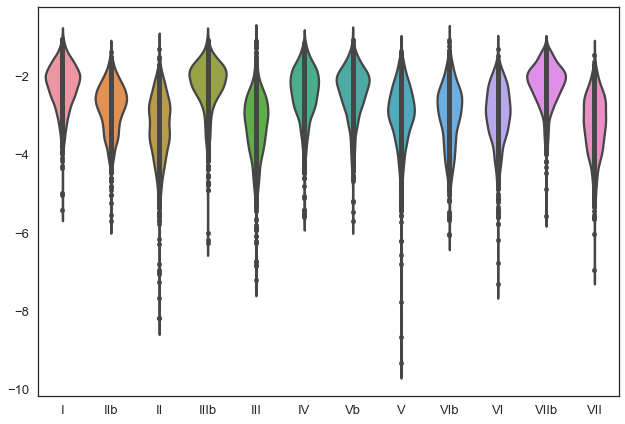

In [100]:
sns.violinplot(data=dHdim, inner="point")
plt.show()

1 30923.9549294 True
2 30045.2287461 True
3 29452.2318222 True
4 29357.6649957 True
5 29130.3298787 True
6 29106.36199 True
7 29095.3386044 True
8 29521.7385843 True
9 29786.9426329 True
10 29931.3348237 True
11 30402.5233541 True
12 30772.944377 True
13 31095.2731335 True
14 31112.9677142 True
15 31697.3766091 True
16 31971.9576506 True
17 31533.7328652 True
18 31816.4531155 True
19 31762.7944878 True
20 32179.7316809 True
21 33000.3909497 True
22 32934.693222 True
23 32796.2970598 True
24 33391.3612787 True
25 33701.6553164 True
26 33994.7273649 True
27 34419.5089936 True
28 34577.5719372 True
29 34851.1752276 True
30 35259.8133349 True
31 35228.2057688 True
32 35814.9498208 True
33 35841.1539589 True
34 36034.7546832 True
35 36375.3761038 True
36 36408.592572 True
37 36937.8911735 True
38 36719.9005957 True
39 37374.5180641 True
40 37248.68255 True
41 37589.7591405 True
42 38610.2197286 True
43 38591.2771408 True
44 38271.2439006 True
45 38496.6413467 True
46 38537.8301313 True
47 3

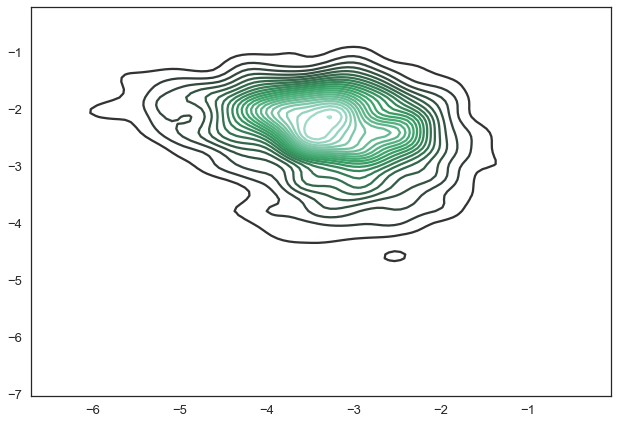

In [101]:
gm = fitMixture(dHdim.values, max_components=50)
#gm = GaussianMixture(
#    n_components=30, covariance_type='full',
#    max_iter=200,
#    random_state = 8)
#gm.fit(dHdim.values)
gmHdim=gm
print gm.converged_
print gm.bic(dHdim.values)
print gm.weights_

samples = np.asarray(gm.sample(1000)[0])
samples[:,[9, 11]].shape
sns.kdeplot(samples[:,[2, 5]], n_levels=30)
plt.show()

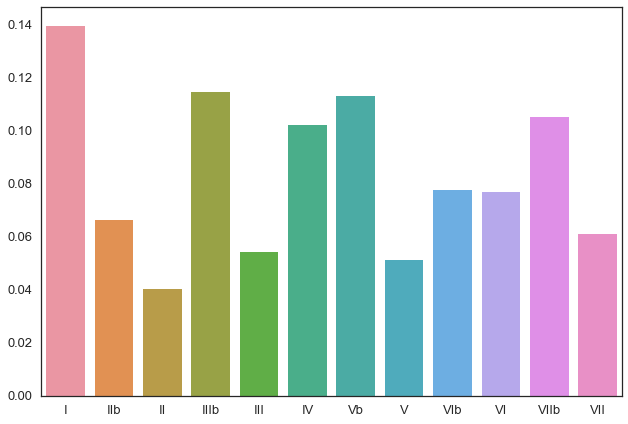

,I,IIb,II,IIIb,III,IV,Vb,V,VIb,VI,VIIb,VII
0,0.13941,0.066287,0.040154,0.114287,0.054254,0.102019,0.112841,0.050935,0.07733,0.076695,0.104872,0.060917


In [47]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax = np.reshape(np.array(ax), (1, np.size(ax)))[0]


for i in range(len(gm.means_)):
  sns.barplot(degrees,gm.means_[i], ax=ax[i])

plt.show()

df = pd.DataFrame(gm.means_, columns=degrees)
df

# Dim

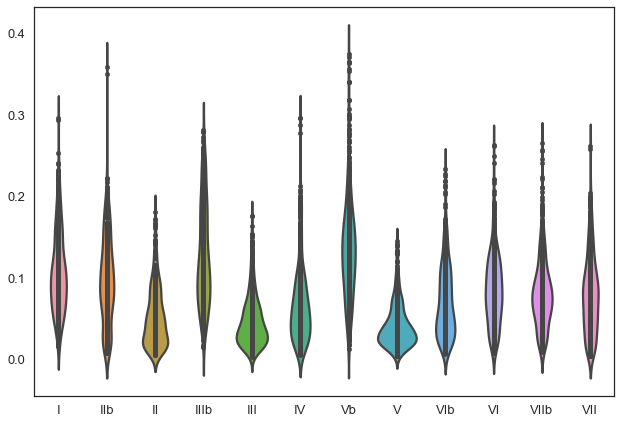

In [48]:
sns.violinplot(data=dDim, inner="point")
plt.show()

1 -28209.2561917 True
2 -28676.9020561 True
3 -28577.2691556 True
4 -28532.3715427 True
5 -28496.3524199 True
6 -28380.7807358 True
7 -28039.8861295 True
8 -27822.3352684 True
9 -27556.7803923 True
10 -27165.0154567 True
11 -27152.3926558 True
12 -26982.2572759 True
13 -26517.3184955 True
14 -26359.8497331 True
15 -26004.5210486 True
16 -25657.8161769 True
17 -25492.1730351 True
18 -25056.8800255 True
19 -24717.1446769 True
20 -24543.3438065 True
21 -24083.2381898 True
22 -23702.4457087 True
23 -23409.036623 True
24 -23222.1221895 True
25 -22917.4163914 True
26 -22614.3535939 True
27 -22384.7805747 True
28 -22218.5465789 True
29 -21689.3966559 True
30 -21475.2828089 True
31 -21189.8319337 True
32 -20884.7017237 True
33 -20627.9455023 True
34 -20195.3723585 True
35 -19995.0364691 True
36 -19741.4881508 True
37 -19608.7321603 True
38 -19239.9979281 True
39 -18945.2526471 True
40 -18796.0208761 True
41 -18546.3725439 True
42 -18132.0155029 True
43 -17773.5157257 True
44 -17636.83552 True


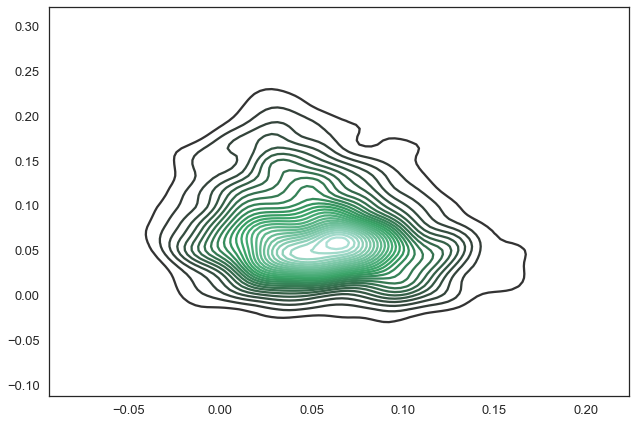

In [49]:
gm = fitMixture(dDim.values, max_components=50)
#gm = GaussianMixture(
#    n_components=55, covariance_type='full',
#    max_iter=200,
#    random_state = 8)
#gm.fit(dDim.values)
gmDim=gm
print gm.converged_
print gm.bic(dDim)
print gm.weights_

samples = np.asarray(gm.sample(1000)[0])
samples[:,[9, 11]].shape
sns.kdeplot(samples[:,[2, 5]], n_levels=30)
plt.show()

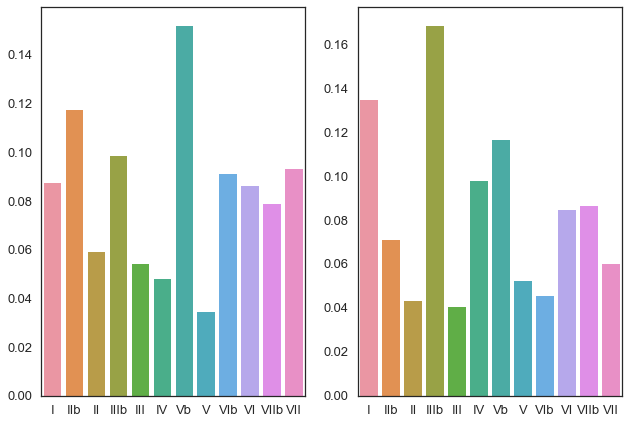

,I,IIb,II,IIIb,III,IV,Vb,V,VIb,VI,VIIb,VII
0,0.087476,0.117310,0.059024,0.098613,0.053927,0.048021,0.151997,0.034415,0.091155,0.086248,0.078809,0.093006
1,0.134731,0.070663,0.043209,0.168394,0.040191,0.097791,0.116503,0.052259,0.045456,0.084586,0.086235,0.059984


In [50]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax = np.reshape(np.array(ax), (1, np.size(ax)))[0]


for i in range(len(gm.means_)):
  sns.barplot(degrees,gm.means_[i], ax=ax[i])

plt.show()

df = pd.DataFrame(gm.means_, columns=degrees)
df

In [51]:
def chordScore(chroma):
    norm = logsumexp([gmMaj.score_samples(chroma) + np.log(np.array([float(len(dMaj))/len(chromas)])),\
    gmMin.score_samples(chroma) + math.log(float(len(dMin))/len(chromas)),\
    gmDom.score_samples(chroma) + math.log(float(len(dDom))/len(chromas)),\
    gmHdim.score_samples(chroma) + math.log(float(len(dHdim))/len(chromas)),\
    gmDim.score_samples(chroma) + math.log(float(len(dDim))/len(chromas))], axis=0)
    return np.array([\
    (gmMaj.score_samples(chroma) + math.log(float(len(dMaj))/len(chromas))) - norm, \
    (gmMin.score_samples(chroma) + math.log(float(len(dMin))/len(chromas))) - norm, \
    (gmDom.score_samples(chroma) + math.log(float(len(dDom))/len(chromas)))  - norm, \
    (gmHdim.score_samples(chroma) + math.log(float(len(dHdim))/len(chromas)))  - norm, \
    (gmDim.score_samples(chroma) + math.log(float(len(dDim))/len(chromas))) - norm])

In [52]:
def correctNum(chromas, classN):
    res=np.exp(chordScore(chromas))
    m = np.max(res, axis=0)
    return np.sum(res[classN] == m)

In [53]:
def accuracy(chromas, classN):
    return float(correctNum(chromas, classN)) / len(chromas) * 100.0

In [54]:
print 'maj', accuracy(dMaj.values, 0)
print 'min', accuracy(dMin.values, 1)
print 'dom', accuracy(dDom.values, 2)
print 'hdim', accuracy(dHdim.values, 3)
print 'dim', accuracy(dDim.values, 4)
print 'total (train error)', float(correctNum(dMaj.values, 0) + correctNum(dMin.values, 1) + correctNum(dDom.values, 2) +correctNum(dHdim.values, 3) + correctNum(dDim.values, 4)) /\
(len(dMaj.values) + len(dMin.values) + len(dDom.values) + len(dHdim.values) + len(dDim.values)) * 100

maj 81.6385822196
min 80.1072066706
dom 81.3263076725
hdim 40.0
dim 80.0347222222
total 80.8523121233


In [55]:
chromas[0]

array([ 0.03166625,  0.07464851,  0.03824636,  0.15397081,  0.02247348,
        0.01862632,  0.16934241,  0.01058287,  0.01385677,  0.14309676,
        0.02654827,  0.29694119], dtype=float32)

# Check artificial binary patterns (min7 classified as dominant, the rest is Ok)

In [68]:
print 'maj7', np.exp(chordScore([[0.25, 0, 0, 0, 0.25, 0, 0, 0.25, 0, 0, 0.0, 0.25]]))
print 'maj', np.exp(chordScore([[0.33, 0, 0, 0, 0.33, 0, 0, 0.33, 0, 0, 0.0, 0.0]]))
print 'maj6', np.exp(chordScore([[0.25, 0, 0, 0, 0.25, 0, 0, 0.25, 0, 0.25, 0.0, 0.0]]))
print 'min7', np.exp(chordScore([[0.25, 0, 0, 0.25, 0.0, 0, 0, 0.25, 0, 0, 0.25, 0.0]]))
print 'hdim7', np.exp(chordScore([[0.25, 0, 0, 0.25, 0.0, 0, 0.25, 0.0, 0, 0, 0.25, 0.0]]))
print 'dim', np.exp(chordScore([[0.33, 0, 0, 0.33, 0.0, 0, 0.33, 0.0, 0, 0, 0.0, 0.0]]))

maj7 [[  9.99964889e-01]
 [  6.94317307e-11]
 [  3.51105683e-05]
 [  2.96541106e-25]
 [  3.07142901e-29]]
maj [[  9.95904993e-01]
 [  1.70018768e-12]
 [  4.09500693e-03]
 [  2.11813838e-46]
 [  2.77516490e-49]]
maj6 [[  9.82783484e-01]
 [  1.65190721e-12]
 [  1.72165165e-02]
 [  3.97589007e-37]
 [  1.63250616e-33]]
min7 [[  5.73109568e-03]
 [  9.93673295e-01]
 [  5.95609066e-04]
 [  1.59019490e-14]
 [  1.70402385e-16]]
hdim7 [[  5.02363530e-12]
 [  8.71387002e-01]
 [  9.36631966e-05]
 [  1.28519217e-01]
 [  1.18168823e-07]]
dim [[  8.14716773e-13]
 [  1.00200088e-13]
 [  2.43366723e-15]
 [  8.07812531e-14]
 [  1.00000000e+00]]


# Check guitar chords

In [12]:
chromas, labels, kinds, mbids, start_times, durations = chordUtils.loadDatasetChroma('../guitar35.npz')
chromas = logNormalize(chromas)
a = np.exp(chordScore(chromas))
m = np.max(a, axis=0)
print "accuracy for major triads played on guitar: ", np.sum(a[0] == m) * 100.0 / chromas.shape[0], '%'

NameError: name 'chordScore' is not defined

# SVM (just for example)

In [11]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from scipy.misc import logsumexp
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import linear_model, datasets
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

clf = svm.SVC(C=11, kernel = 'rbf', gamma=1.0)
clf.fit(chromas, kinds)
print "Train error:", clf.score(chromas, kinds) * 100.0, '%'


clf = svm.SVC(C=11, kernel = 'rbf', gamma=1.0)
#clf.fit(chromas, kinds)
#clf.score(chromas, kinds)
kf = KFold(n_splits=10, shuffle=True)
svm_scores = cross_val_score(clf, chromas, kinds, cv=kf, n_jobs=-1)
# 90% cross validation. (79% with normalization)
score = svm_scores.mean()
print "Test error (on crossvalidation):", score * 100.0, '%'

Train error: 97.6377952756 %
Test error (on crossvalidation): 97.2153846154 %
